In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

In [2]:
%matplotlib inline

- f1: pick n random points in [-1, 1] X [-1, 1] $x_1$ and $x_2$ -> use to pick 2 points
- f2: find (w_0, w_1, w_2) s.t. $w_0 + w_1 x_1 + w_2 x_2 = 0$
- **Note:** in f2 above, the equation is a dot product between $\textbf{w} = (w_0, w_1, w_2)$ and $\textbf{x} = (1, x_1, x_2)$
- f3: draw n random points in [-1, 1] X [-1, 1] and classify them based on whether their dot prod with $\textbf{x}$ is >0 (+1) or <0 (-1)

In [3]:
def random_point_select(n, d=2, l_range=-1, h_range=1):
    """
    inputs: n, no. of points required
    d: dimension of points
    l_range: min value for each dimension
    h_range: max value for each dimension
    returns: n uniform random points of dim = d between a l_range and h_range 
    return type: numpy ndarray
    """
    
    point_list = []
    x_n = np.random.uniform(l_range, h_range, size=(d, n))
    return x_n

In [4]:
def random_2d_line(l_range=-1, h_range=1):
    """
    inputs: l_range and h_range -> lower and higher values
    returns: (w0, w1, w2) the params of a wt vector s.t. <w, x> is the st line. <w, x> -> dot product
    return type: numpy ndarrays
    """
    
    points = random_point_select(2)
    m = (points[1, 0]-points[1, 1])/(points[0, 0]-points[0, 1])
    c = points[1, 0] - m * points[0, 0]
    wts = np.array([c, m, -1]).reshape(3, 1)
    # adding dummy x_0 = 1 to each point
    points = np.insert(points, 0, 1, axis=0)
    return points, wts

In [5]:
def classify_2d_points(n, l_range=-1, h_range=1):
    """
    inputs: 
    n -> number of points to be generated and classified between l_range and h_range
    outputs: 
    lin_points -> points generating the random line as (1, x1, x2) (2X3 ndarray)
    cls_points -> points to be classified as (1, x1, x2) (nX3 ndarray)
    wts -> weights (3X1 ndarray)
    cls -> classification array with +1 or -1 (nX1 ndarray)
    """
    
    cls_points = random_point_select(n)
    cls_points = np.insert(cls_points, 0, 1, axis=0)
    lin_pts, wts = random_2d_line(l_range=l_range, h_range=h_range)
    cls_vals = np.dot(wts.T, cls_points)
    cls_lab = np.sign(cls_vals) 
    return lin_pts, cls_points, wts, cls_lab

In [56]:
def plot_2d_classification_example(n, l_range=-1, h_range=1):
    lin_pts, cls_pts, wts, cls_lab = classify_2d_points(n)
    
    # plotting the 2 points that generated the line
    plt.plot(lin_pts[1, 0], lin_pts[2, 0], 'mo')
    plt.plot(lin_pts[1, 1], lin_pts[2, 1], 'mo')
    
    # plotting the line itself
    x = np.linspace(l_range, h_range, 20).reshape(20, 1)
    y = wts[1]*x + wts[0]         # since wts are in form [w0, w1, w2].T => c, m, -1
    plt.plot(x, y, 'b')  
    
    # plotting the classification points, coloured by +1 or -1, green or red 
    plt.scatter(cls_pts[1, :], cls_pts[2, :], c=cls_lab, s=80)  
    plt.set_cmap('gray_r')  #setting colormap to 'gray_r' reversed
    
    # link: list of colormaps:
    # http://matplotlib.org/examples/color/colormaps_reference.html
    # link: pyplot 'set_cmap()' command with reverses
    # http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps
    
    plt.plot() 
    
    plt.xlim(l_range, h_range)
    plt.ylim(l_range, h_range)
    
    return lin_pts, cls_pts, wts, cls_lab

In [10]:
def perceptron_learning_algo_2d(n, l_range=-1, h_range=1):
    lp, cp, wts, c_lab = classify_2d_points(n) 
    params = np.zeros((3, 1))
    y_lab = np.sign(np.dot(params.T, cp))     
    
    count = 0
    
    while (np.any(y_lab != c_lab)):
        count+= 1
        
        # select those indices where there is a misclassification
        misc_val, misc_pos = np.where(y_lab != c_lab)
        
        # select the corresponding x_vectors
        misc_cp = cp[:, misc_pos]
        
        # pick one of those at random and the corresponding x_vector
        
        misc_x_rindex = np.random.randint(misc_pos.shape[0]) 
        misc_x_rpick = misc_cp[:, misc_x_rindex]
        
        # pick corresponding y
        misc_y = c_lab[:, misc_pos]
        y_misc_pick = misc_y[:, misc_x_rindex] 
        
        # update params
        params = params + (y_misc_pick * misc_x_rpick).reshape(3, 1)
        
        y_lab = np.sign(np.dot(params.T, cp))  
        
    return count, params, wts

In [120]:
def plot_perceptron_learning_algo_2d(n, l_range=-1, h_range=1):
    lp, cp, wts, c_lab = plot_2d_classification_example(n) 
    params = np.zeros((3, 1))
    y_lab = np.sign(np.dot(params.T, cp))     
    
    count = 0
    
    while (np.any(y_lab != c_lab)):
        count+= 1
        
        # select those indices where there is a misclassification
        misc_val, misc_pos = np.where(y_lab != c_lab)
        
        # select the corresponding x_vectors
        misc_cp = cp[:, misc_pos]
        
        # pick one of those at random and the corresponding x_vector
        
        misc_x_rindex = np.random.randint(misc_pos.shape[0]) 
        misc_x_rpick = misc_cp[:, misc_x_rindex]
        
        # pick corresponding y
        misc_y = c_lab[:, misc_pos]
        y_misc_pick = misc_y[:, misc_x_rindex] 
        
        # update params
        params = params + (y_misc_pick * misc_x_rpick).reshape(3, 1)
        
        y_lab = np.sign(np.dot(params.T, cp))  
        
    # plotting the classifier line
    x = np.linspace(l_range, h_range, 20).reshape(20, 1)
    y = (-params[1]/params[2])*x + (-params[0]/params[2])   # eq: w0 + w1.x + w2.y = 0 -> y = (-w1/w2)x + (w0/w2)
    plt.plot(x, y, 'g') 
    
    return count, params, wts, y_lab, c_lab

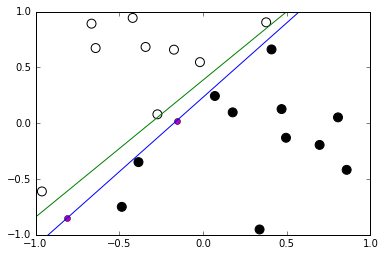

In [146]:
iterations, h, g, y_labels, c_labels = plot_perceptron_learning_algo_2d(20)  

In [82]:
y_labels

array([[ 1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.]])

In [83]:
c_labels

array([[ 1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.]])

In [229]:
diff_prob = 0
loops = 10000
for i in range(loops):
    
    N = 100
    iterations, g, h = perceptron_learning_algo_2d(N) 

    # print(iterations) 

    # x = np.linspace(-1, 1, 20).reshape(20, 1)
    # y = (-h[1]/h[2])*x + (-h[0]/h[2])   
    # plt.plot(x, y, 'r') 

    # x = np.linspace(-1, 1, 20).reshape(20, 1)
    # y = (-g[1]/g[2])*x + (-g[0]/g[2])   
    # plt.plot(x, y, 'm') 

    n = 10000
    test_set = random_point_select(n) 
    test_set_with_dummy = np.insert(test_set, 0, 1, axis=0)
    g_res = np.sign(np.dot(g.T, test_set_with_dummy))
    h_res = np.sign(np.dot(h.T, test_set_with_dummy)) 
    diff_prob = diff_prob + np.count_nonzero(g_res - h_res)/n

print(diff_prob/loops)
# plt.plot(test_set[0], test_set[1], 'bo') 

0.013217870000000041
